In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft

In [2]:
def readcfl(name):
    # get dims from .hdr
    h = open(name + ".hdr", "r")
    h.readline() # skip
    l = h.readline()
    h.close()
    dims = [int(i) for i in l.split( )]

    # remove singleton dimensions from the end
    n = np.prod(dims)
    dims_prod = np.cumprod(dims)
    dims = dims[:np.searchsorted(dims_prod, n)+1]

    # load data and reshape into dims
    d = open(name + ".cfl", "r")
    a = np.fromfile(d, dtype=np.complex64, count=n);
    d.close()
    return a.reshape(dims, order='F') # column-major

In [92]:
f_base = "/home/gogol/BI201/2019-11-22_1/20191122_vo1"
f_ng_o = f_base + "_nufft_rss"
f_mr_o = f_base + "_mr_rec"
f_sg_o = f_base + "_sg_rec"
f_resp = f_base + "_resp"

f_ng_ds = f_base + "_ds_nufft_rss"
f_mr_ds = f_base + "_ds_mr_rec"
f_sg_ds = f_base + "_ds_sg_rec"

# Original

In [93]:
ng = readcfl(f_ng_o)

In [94]:
ng.shape

(208, 128, 160)

In [95]:
ng = ng / ng.max()

In [96]:
def showAx_NG(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.abs(ng[:,:,x]))
    
def showSag_NG(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.abs(ng[x,:,:]))

def showCor_NG(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.rot90(np.abs(ng[:,x,:])))
    plt.title("Coronal Slice No Gated")

In [97]:
interact(showSag_NG, x=widgets.IntSlider(min=0, max=ng.shape[0]-1, step=1, value=ng.shape[0]/2));
interact(showCor_NG, x=widgets.IntSlider(min=0, max=ng.shape[1]-1, step=1, value=ng.shape[1]/2));
interact(showAx_NG, x=widgets.IntSlider(min=0, max=ng.shape[2]-1, step=1, value=ng.shape[2]/2));

interactive(children=(IntSlider(value=104, description='x', max=207), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=64, description='x', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=80, description='x', max=159), Output()), _dom_classes=('widget-interact…

# Motion Resolved

In [45]:
d = readcfl(f_mr_o)

In [46]:
d.shape

(208, 128, 160, 1, 1, 1, 1, 1, 1, 1, 4)

In [47]:
d = d[:,:,:,0, 0, 0, 0, 0, 0, 0, 0]

In [48]:
d.shape
d = d / d.max()

In [49]:
img = d[:,:,80]

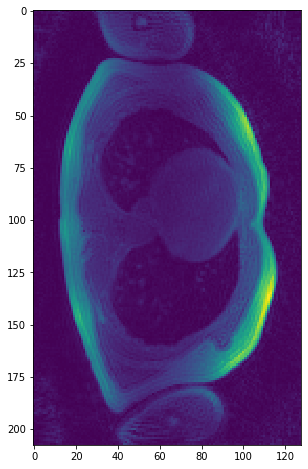

In [50]:
plt.figure(figsize=(12,8))
plt.imshow(np.abs(img));

In [51]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [52]:
def showAx(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.abs(d[:,:,x]))

In [53]:
interact(showAx, x=widgets.IntSlider(min=0, max=d.shape[2]-1, step=1, value=d.shape[2]/2));

interactive(children=(IntSlider(value=80, description='x', max=159), Output()), _dom_classes=('widget-interact…

In [54]:
def showCor(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.rot90(np.abs(d[:,x,:])))
    plt.title("Coronal Slice MR")

In [55]:
interact(showCor, x=widgets.IntSlider(min=0, max=d.shape[1]-1, step=1, value=d.shape[1]/2));

interactive(children=(IntSlider(value=64, description='x', max=127), Output()), _dom_classes=('widget-interact…

In [56]:
def showSag(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.abs(d[x,:,:]))

In [57]:
interact(showSag, x=widgets.IntSlider(min=0, max=d.shape[0]-1, step=1, value=d.shape[0]/2));

interactive(children=(IntSlider(value=104, description='x', max=207), Output()), _dom_classes=('widget-interac…

## SG Data

In [58]:
sg_d = readcfl(f_sg_o)
sg_d = sg_d / sg_d.max()

In [59]:
def showAx_SG(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.abs(sg_d[:,:,x]))
    
def showSag_SG(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.abs(sg_d[x,:,:]))

def showCor_SG(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.rot90(np.abs(sg_d[:,x,:])))
    plt.title("Coronal Slice Soft Gated")

In [60]:
interact(showSag_SG, x=widgets.IntSlider(min=0, max=sg_d.shape[0]-1, step=1, value=sg_d.shape[0]/2));

interactive(children=(IntSlider(value=104, description='x', max=207), Output()), _dom_classes=('widget-interac…

In [61]:
interact(showCor_SG, x=widgets.IntSlider(min=0, max=sg_d.shape[1]-1, step=1, value=sg_d.shape[1]/2));

interactive(children=(IntSlider(value=64, description='x', max=127), Output()), _dom_classes=('widget-interact…

In [62]:
interact(showAx_SG, x=widgets.IntSlider(min=0, max=sg_d.shape[2]-1, step=1, value=sg_d.shape[2]/2));

interactive(children=(IntSlider(value=80, description='x', max=159), Output()), _dom_classes=('widget-interact…

# Respitory Gated

In [63]:
r = np.abs(readcfl(f_resp))
lower_thresh = np.full(r.shape,2850)
upper_thresh = np.full(r.shape,2950)

/home/gogol/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/gogol/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


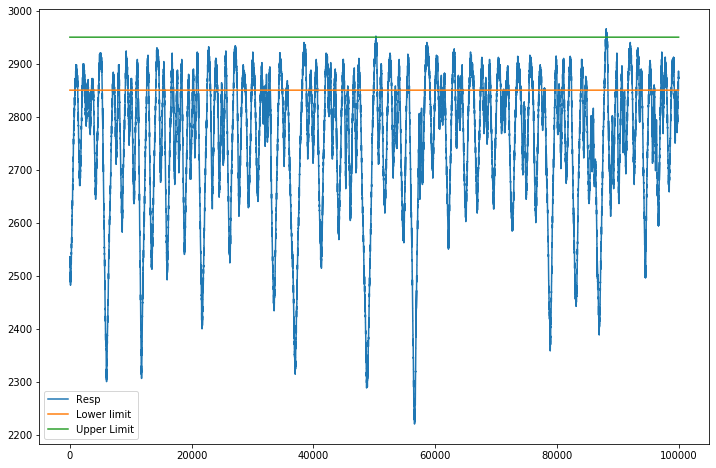

In [64]:
plt.figure(figsize=(12,8))
plt.plot(r);
plt.plot(lower_thresh);
plt.plot(upper_thresh);
plt.legend(["Resp","Lower limit","Upper Limit"]);

In [86]:
d_ds = readcfl(f_mr_ds)

In [87]:
d_ds.shape
d_ds = d_ds / d_ds.max()

In [88]:
d_ds = d_ds[:,:,:,0, 0, 0, 0, 0, 0, 0, 0]

In [89]:
def showAx_DS(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.abs(d_ds[:,:,x]))
    
def showSag_DS(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.abs(d_ds[x,:,:]))

def showCor_DS(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.rot90(np.abs(d_ds[:,x,:])))
    plt.title("Coronal Slice Gated")

In [83]:
interact(showAx_DS, x=widgets.IntSlider(min=0, max=d_ds.shape[2]-1, step=1, value=d_ds.shape[2]/2));

interactive(children=(IntSlider(value=80, description='x', max=159), Output()), _dom_classes=('widget-interact…

In [90]:
interact(showCor_DS, x=widgets.IntSlider(min=0, max=d_ds.shape[1]-1, step=1, value=d_ds.shape[1]/2));

interactive(children=(IntSlider(value=64, description='x', max=127), Output()), _dom_classes=('widget-interact…

In [71]:
interact(showSag_DS, x=widgets.IntSlider(min=0, max=d_ds.shape[0]-1, step=1, value=d_ds.shape[0]/2));

interactive(children=(IntSlider(value=104, description='x', max=207), Output()), _dom_classes=('widget-interac…

## SG Data

In [72]:
fp = "/home/gogol/BI201/2019-11-25/20191125_vo_ds_sg_rec"
sg_d_ds = readcfl(f_sg_ds)

In [73]:
sg_d_ds.shape
sg_d_ds = sg_d_ds / sg_d_ds.max()

In [74]:
def showAx_DS_SG(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.abs(sg_d_ds[:,:,x]))
    
def showSag_DS_SG(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.abs(sg_d_ds[x,:,:]))

def showCor_DS_SG(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.abs(sg_d_ds[:,x,:]))

In [75]:
interact(showSag_DS_SG, x=widgets.IntSlider(min=0, max=sg_d_ds.shape[0]-1, step=1, value=sg_d_ds.shape[0]/2));
interact(showCor_DS_SG, x=widgets.IntSlider(min=0, max=sg_d_ds.shape[1]-1, step=1, value=sg_d_ds.shape[1]/2));
interact(showAx_DS_SG, x=widgets.IntSlider(min=0, max=sg_d_ds.shape[2]-1, step=1, value=sg_d_ds.shape[2]/2));

interactive(children=(IntSlider(value=104, description='x', max=207), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=64, description='x', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=80, description='x', max=159), Output()), _dom_classes=('widget-interact…

# Deltas

In [76]:
def showAx_DELTA(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.log((np.abs(d_ds[:,:,x]) - np.abs(d[:,:,x])) + 1))
    
def showSag_DELTA(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.log((np.abs(d_ds[x,:,:]) - np.abs(d[x,:,:])) + 1))

def showCor_DELTA(x):
    plt.figure(figsize=(12,8))
    plt.imshow(np.log((np.abs(d_ds[:,x,:]) - np.abs(d[:,x,:])) + 1))

In [77]:
interact(showSag_DELTA, x=widgets.IntSlider(min=0, max=sg_d_ds.shape[0]-1, step=1, value=sg_d_ds.shape[0]/2));
interact(showCor_DELTA, x=widgets.IntSlider(min=0, max=sg_d_ds.shape[1]-1, step=1, value=sg_d_ds.shape[1]/2));
interact(showAx_DELTA, x=widgets.IntSlider(min=0, max=sg_d_ds.shape[2]-1, step=1, value=sg_d_ds.shape[2]/2));

interactive(children=(IntSlider(value=104, description='x', max=207), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=64, description='x', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=80, description='x', max=159), Output()), _dom_classes=('widget-interact…

# Plot Generation

In [66]:
f_base = "/home/gogol/BI201/2019-11-25/20191125_vo"
f_ng_o = f_base + "_nufft_rss"
f_mr_o = f_base + "_mr_rec"
f_sg_o = f_base + "_sg_rec"
f_resp = f_base + "_resp"

f_ng_ds = f_base + "_ds_nufft_rss"
f_mr_ds = f_base + "_ds_mr_rec"
f_sg_ds = f_base + "_ds_sg_rec"

In [67]:
ng_o = readcfl(f_ng_o)
mr_o = readcfl(f_mr_o)[:,:,:, 0, 0, 0, 0, 0, 0, 0, 0]
sg_o = readcfl(f_sg_o)

In [68]:
ng_o = ng_o / ng_o.max()
mr_o = mr_o / mr_o.max()
sg_o = sg_o / sg_o.max()

In [69]:
ng_ds = readcfl(f_ng_ds)
mr_ds = readcfl(f_mr_ds)[:,:,:, 0, 0, 0, 0, 0, 0, 0, 0]
sg_ds = readcfl(f_sg_ds)

In [70]:
ng_ds = ng_ds / ng_ds.max()
mr_ds = mr_ds / mr_ds.max()
sg_ds = sg_ds / sg_ds.max()

In [71]:
coronal_slice = 64

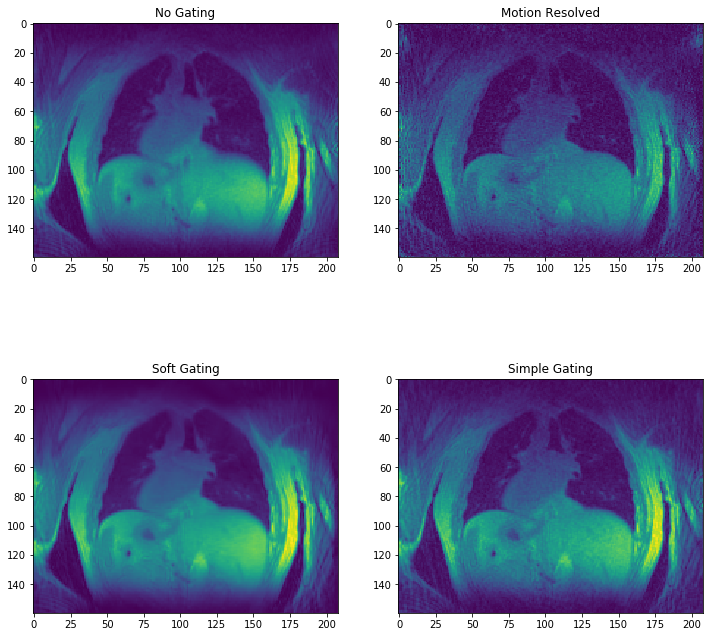

In [72]:
plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
plt.imshow(np.rot90(np.abs(ng_o[:,coronal_slice,:])))
plt.title("No Gating");

plt.subplot(2, 2, 2)
plt.imshow(np.rot90(np.abs(mr_o[:,coronal_slice,:])))
plt.title("Motion Resolved");

plt.subplot(2, 2, 3)
plt.imshow(np.rot90(np.abs(sg_o[:,coronal_slice,:])))
plt.title("Soft Gating");

plt.subplot(2, 2, 4)
plt.imshow(np.rot90(np.abs(ng_ds[:,coronal_slice,:])))
plt.title("Simple Gating");

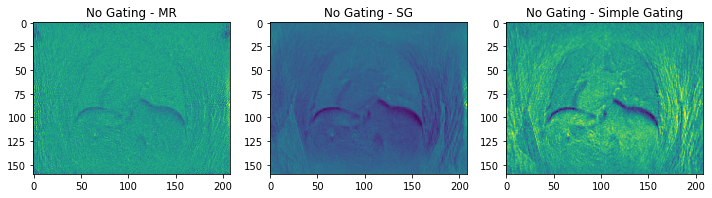

In [51]:
plt.figure(figsize=(12,8))

plt.subplot(1, 3, 1)
plt.imshow(np.rot90(np.abs(ng_o[:,coronal_slice,:]) - np.abs(mr_o[:,coronal_slice,:])))
plt.title("No Gating - MR");

plt.subplot(1, 3, 2)
plt.imshow(np.rot90(np.abs(ng_o[:,coronal_slice,:]) - np.abs(sg_o[:,coronal_slice,:])))
plt.title("No Gating - SG");

plt.subplot(1, 3, 3)
plt.imshow(np.rot90(np.abs(ng_o[:,coronal_slice,:]) - np.abs(ng_ds[:,coronal_slice,:])))
plt.title("No Gating - Simple Gating");

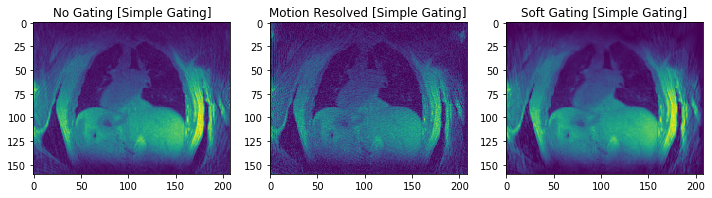

In [46]:
plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
plt.imshow(np.rot90(np.abs(ng_ds[:,coronal_slice,:])))
plt.title("No Gating [Simple Gating]");

plt.subplot(1, 3, 2)
plt.imshow(np.rot90(np.abs(mr_ds[:,coronal_slice,:])))
plt.title("Motion Resolved [Simple Gating]");

plt.subplot(1, 3, 3)
plt.imshow(np.rot90(np.abs(sg_ds[:,coronal_slice,:])))
plt.title("Soft Gating [Simple Gating]");

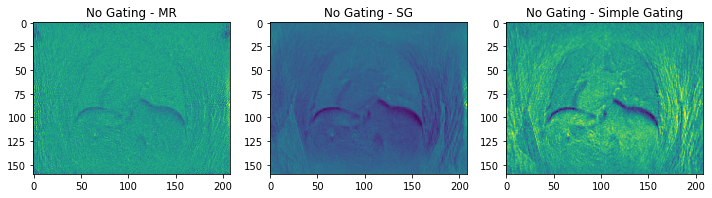

In [44]:
plt.figure(figsize=(12,8))

plt.subplot(1, 3, 1)
plt.imshow(np.rot90(np.abs(ng_o[:,coronal_slice,:]) - np.abs(mr_o[:,coronal_slice,:])))
plt.title("No Gating - MR");

plt.subplot(1, 3, 2)
plt.imshow(np.rot90(np.abs(ng_o[:,coronal_slice,:]) - np.abs(sg_o[:,coronal_slice,:])))
plt.title("No Gating - SG");

plt.subplot(1, 3, 3)
plt.imshow(np.rot90(np.abs(ng_o[:,coronal_slice,:]) - np.abs(ng_ds[:,coronal_slice,:])))
plt.title("No Gating - Simple Gating");